# Function Transformation 

In [40]:
# This is used when you want to make your data according to your required functions.
# Import the libraries
import pandas as pd 
import numpy as np
import seaborn as sns 

In [12]:
# Import Dataset
dataset=pd.read_excel(r"C:\Users\ASUS\OneDrive\Desktop\Excel project\Order.xlsx")
dataset.head(1)

,Row ID,Order ID,Order Day2,Order Month,Order Year,Ship Day,Ship_Month,Ship_Year],Ship Mode,Customer ID,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,Thursday,August,2016,Friday,November,2016,Second Class,CG-12520,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         4999 non-null   int64  
 1   Order ID       4999 non-null   object 
 2   Order Day2     4999 non-null   object 
 3   Order Month    4999 non-null   object 
 4   Order Year     4999 non-null   int64  
 5   Ship Day       4999 non-null   object 
 6   Ship_Month     4999 non-null   object 
 7   Ship_Year]     4999 non-null   int64  
 8   Ship Mode      4999 non-null   object 
 9   Customer ID    4999 non-null   object 
 10  Customer Name  4999 non-null   object 
 11  Segment        4999 non-null   object 
 12  Country        4999 non-null   object 
 13  City           4999 non-null   object 
 14  State          4999 non-null   object 
 15  Postal Code    4999 non-null   int64  
 16  Region         4999 non-null   object 
 17  Product ID     4999 non-null   object 
 18  Category

In [16]:
dataset["Sales"].isnull().sum()

0

In [18]:
data=dataset["Sales"]

In [22]:
data.describe()

count     4999.000000
mean       228.069084
std        630.373684
min          0.444000
25%         16.560000
50%         52.200000
75%        210.686000
max      22638.480000
Name: Sales, dtype: float64

In [26]:
# Remove the outliers 
# Finding the critical value 
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
Q1,Q3

(16.56, 210.68599999999998)

In [28]:
Min_range=Q1-(1.5*IQR)
Max_range=Q3+(1.5*IQR)
Min_range,Max_range

(-274.62899999999996, 501.87499999999994)

In [34]:
data=data[data<Max_range] # Outliers removed.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22992\642634686.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data)


<Axes: xlabel='Sales', ylabel='Density'>

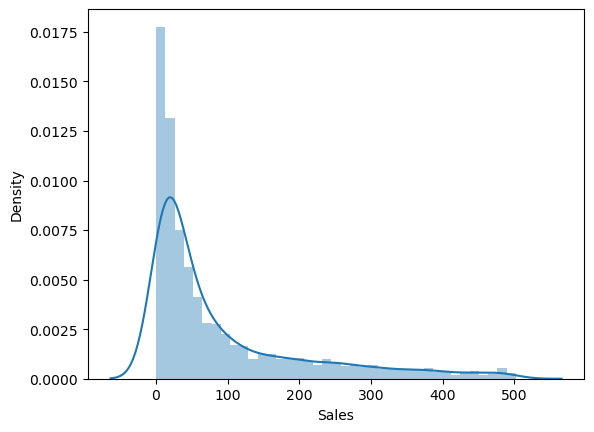

In [42]:
# plot the graph of Sales column after removing the outliers
sns.distplot(data)

In [44]:
# Import Function Transformation Library
from sklearn.preprocessing import FunctionTransformer

In [120]:
ft=FunctionTransformer(func=np.log1p)
ft.fit(data)

FunctionTransformer(func=<ufunc 'log1p'>)

In [122]:
new=ft.transform(data)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22992\3678514099.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,ax=axes[0])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_22992\3678514099.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new,ax=axes[1])


<Axes: ylabel='Density'>

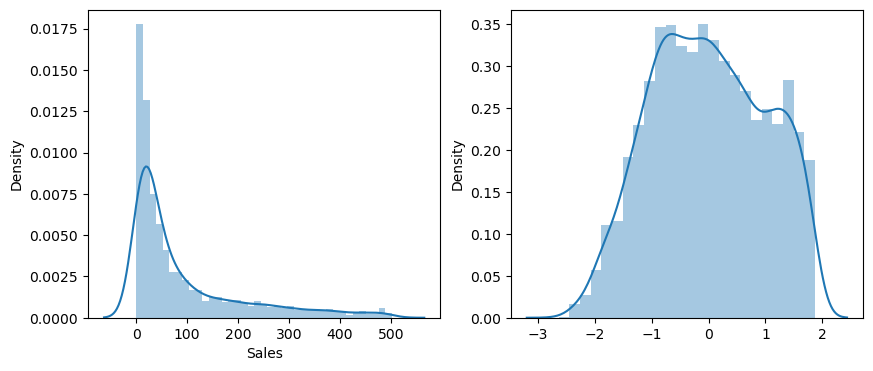

In [132]:
fig,axes=plt.subplots(1,2,figsize=(10,4))
sns.distplot(data,ax=axes[0])
sns.distplot(new,ax=axes[1])

In [130]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')  # Handles zero and negative values
new = pt.fit_transform(data.values.reshape(-1, 1))

In [126]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal', random_state=0)
new = qt.fit_transform(data.values.reshape(-1, 1)) 